# Student Grade Analysis & Prediction

**Objective:** Prediction of the final grade of Portuguese high school students

**Data Set Information**
The data used is from a Portuguese secondary school. The data includes academic and personal characteristics of the students as well as final grades. The task is to predict the final grade from the student information. (Regression)
[Link to dataset](https://archive.ics.uci.edu/ml/datasets/student+performance)

## Import Libraries

In [100]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('whitegrid')

## The Data
Let's start by reading in the student-mat.csv file into a pandas dataframe.

In [101]:
stud = pd.read_csv('data/StudentGrades.csv')

In [102]:
print('Total number of students:', len(stud))

Total number of students: 395


In [103]:
stud['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [104]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   school                      395 non-null    object
 1   sex                         395 non-null    object
 2   age                         395 non-null    int64 
 3   address                     395 non-null    object
 4   family_size                 395 non-null    object
 5   parent_cohabitation_status  395 non-null    object
 6   mother_education            395 non-null    int64 
 7   father_education            395 non-null    int64 
 8   mother_job                  395 non-null    object
 9   father_job                  395 non-null    object
 10  reason                      395 non-null    object
 11  guardian                    395 non-null    object
 12  travel_time                 395 non-null    int64 
 13  study_time                  395 non-null    int64 

In [105]:
stud.columns

Index(['school', 'sex', 'age', 'address', 'family_size',
       'parent_cohabitation_status', 'mother_education', 'father_education',
       'mother_job', 'father_job', 'reason', 'guardian', 'travel_time',
       'study_time', 'failures', 'school_support', 'family_support', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic',
       'family_relation', 'freetime', 'goes_out', 'health', 'absences', 'G1',
       'G2', 'G3'],
      dtype='object')

In [106]:
stud.describe()

,age,mother_education,father_education,travel_time,study_time,failures,family_relation,freetime,goes_out,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [107]:
stud.head()

,school,sex,age,address,family_size,parent_cohabitation_status,mother_education,father_education,mother_job,father_job,...,internet,romantic,family_relation,freetime,goes_out,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,5,4,6,10,10


In [108]:
stud.tail()

,school,sex,age,address,family_size,parent_cohabitation_status,mother_education,father_education,mother_job,father_job,...,internet,romantic,family_relation,freetime,goes_out,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,yes,no,3,2,3,5,5,8,9,9


In [109]:
stud.isnull().any()

school                        False
sex                           False
age                           False
address                       False
family_size                   False
parent_cohabitation_status    False
mother_education              False
father_education              False
mother_job                    False
father_job                    False
reason                        False
guardian                      False
travel_time                   False
study_time                    False
failures                      False
school_support                False
family_support                False
paid                          False
activities                    False
nursery                       False
higher                        False
internet                      False
romantic                      False
family_relation               False
freetime                      False
goes_out                      False
health                        False
absences                    

In [110]:
import cufflinks as cf

cf.go_offline()

In [111]:
stud.iplot()

In [112]:
stud.iplot(kind='scatter', x='age', y='G3', mode='markers', size=8)

In [113]:
stud.iplot(kind='box')

In [114]:
stud['G3'].iplot(kind='hist', bins=100, color='blue')

# Data Visualization

<Axes: >

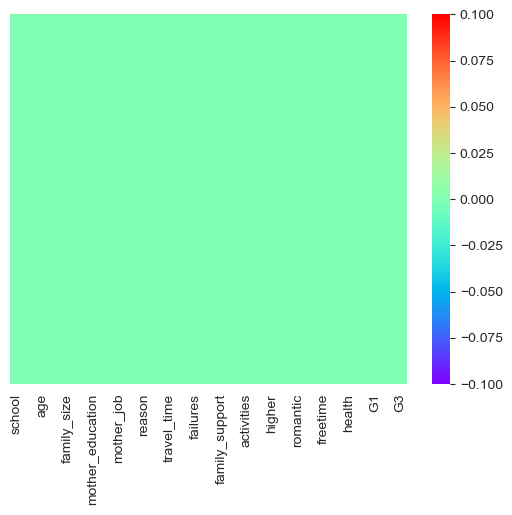

In [115]:
sns.heatmap(stud.isnull(), cmap="rainbow", yticklabels=False)

<Axes: >

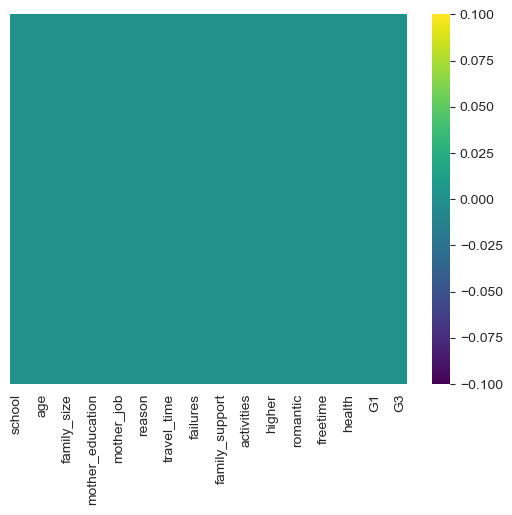

In [116]:
sns.heatmap(stud.isnull(), cmap="viridis", yticklabels=False)

- There are no null values in the given dataset

## Student's Sex

In [117]:
f_stud = len(stud[stud['sex'] == 'F'])
print('Number of female students:', f_stud)
m_stud = len(stud[stud['sex'] == 'M'])
print('Number of male students:', m_stud)

Number of female students: 208
Number of male students: 187


<Axes: xlabel='sex', ylabel='count'>

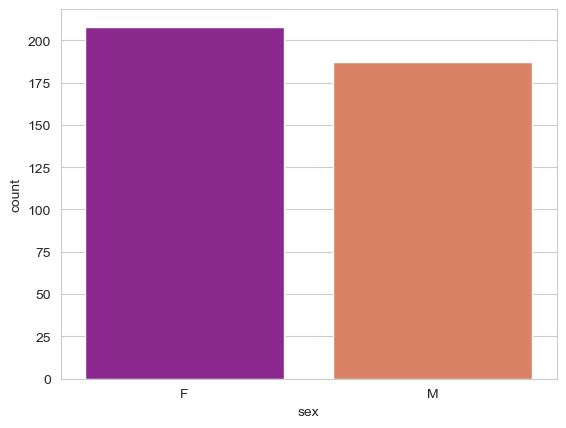

In [118]:
sns.countplot(x='sex', data=stud, palette='plasma', hue='sex')

- The gender distribution is pretty even.

## Age of Students

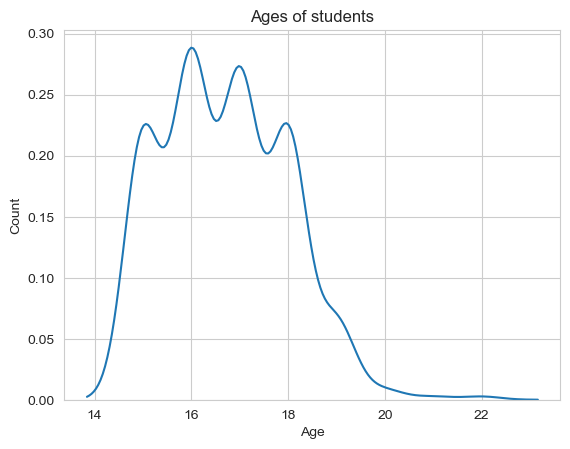

In [119]:
b = sns.kdeplot(stud['age'])
b.axes.set_title('Ages of students')
b.set_xlabel('Age')
b.set_ylabel('Count')
plt.show()

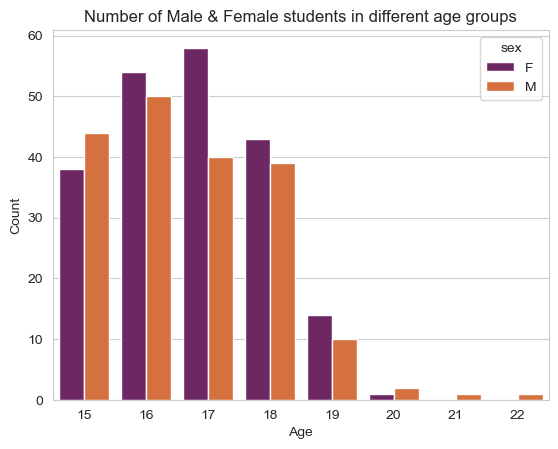

In [120]:
b = sns.countplot(x='age', hue='sex', data=stud, palette='inferno')
b.axes.set_title('Number of Male & Female students in different age groups')
b.set_xlabel("Age")
b.set_ylabel("Count")
plt.show()

- The student age seems to be ranging from 15-19, where gender distribution is pretty even in each age group.
- The age group above 19 may be outliers, year back students or droupouts.

## Students from Urban & Rural Areas

In [121]:
u_stud = len(stud[stud['address'] == 'U'])
print('Number of Urban students:', u_stud)
r_stud = len(stud[stud['address'] == 'R'])
print('Number of Rural students:', r_stud)

Number of Urban students: 307
Number of Rural students: 88


<Axes: xlabel='address', ylabel='count'>

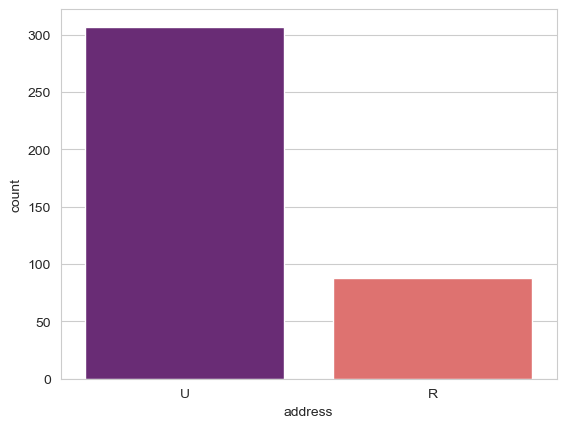

In [122]:
sns.countplot(x='address', hue='address', data=stud, palette='magma')

- Approximately 77.72% students come from urban region and 22.28% from rural region.

<Axes: xlabel='address', ylabel='count'>

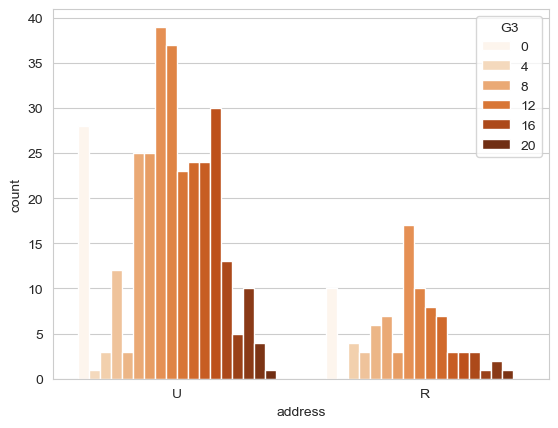

In [123]:
sns.countplot(x='address', hue='G3', data=stud, palette='Oranges')

## Students family size

In [124]:
gt3_stud = len(stud[stud['family_size'] == 'GT3'])
print('Number of students with more than 3 members:', gt3_stud)
le3_stud = len(stud[stud['family_size'] == 'LE3'])
print('Number of students with less than 3 members:', le3_stud)

Number of students with more than 3 members: 281
Number of students with less than 3 members: 114


<Axes: xlabel='family_size', ylabel='count'>

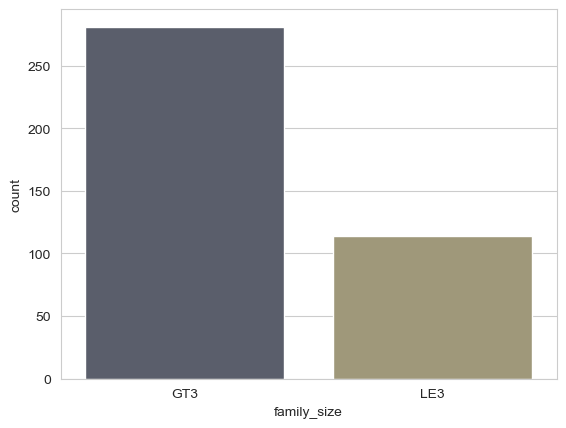

In [125]:
sns.countplot(x='family_size', hue='family_size', data=stud, palette='cividis')

- Approximately 71.14% students come from families with more than 3 members and 28.86% students come from families with less than 3 members

<Axes: xlabel='family_size', ylabel='count'>

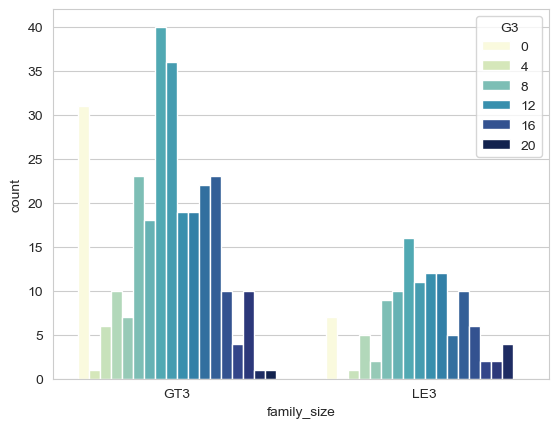

In [126]:
sns.countplot(x='family_size', hue='G3', data=stud, palette='YlGnBu')

## Students parent cohabitation status

In [127]:
a_stud = len(stud[stud['parent_cohabitation_status'] == 'A'])
print('Number of students with parents living away:', a_stud)
t_stud = len(stud[stud['parent_cohabitation_status'] == 'T'])
print('Number of students with parents living together:', t_stud)

Number of students with parents living away: 41
Number of students with parents living together: 354


<Axes: xlabel='parent_cohabitation_status', ylabel='count'>

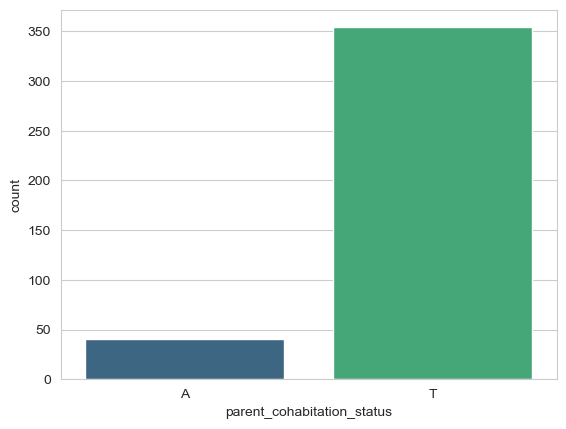

In [128]:
sns.countplot(x='parent_cohabitation_status', hue='parent_cohabitation_status', data=stud, palette='viridis')

- Approximately 10.38% students come from families with parents living away and 89.62% students come from families with parents living together

<Axes: xlabel='parent_cohabitation_status', ylabel='count'>

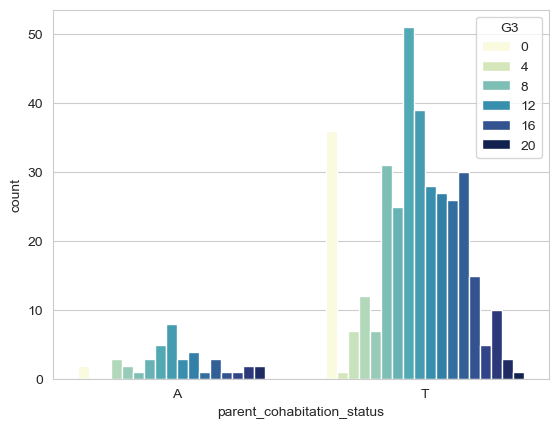

In [129]:
sns.countplot(x='parent_cohabitation_status', hue='G3', data=stud, palette='YlGnBu')

## Students guardian

In [130]:
f_stud = len(stud[stud['guardian'] == 'father'])
print('Number of students with father as guardian:', f_stud)
m_stud = len(stud[stud['guardian'] == 'mother'])
print('Number of students with mother as guardian:', m_stud)
o_stud = len(stud[stud['guardian'] == 'other'])
print('Number of students with other guardian:', o_stud)

Number of students with father as guardian: 90
Number of students with mother as guardian: 273
Number of students with other guardian: 32


<Axes: xlabel='guardian', ylabel='count'>

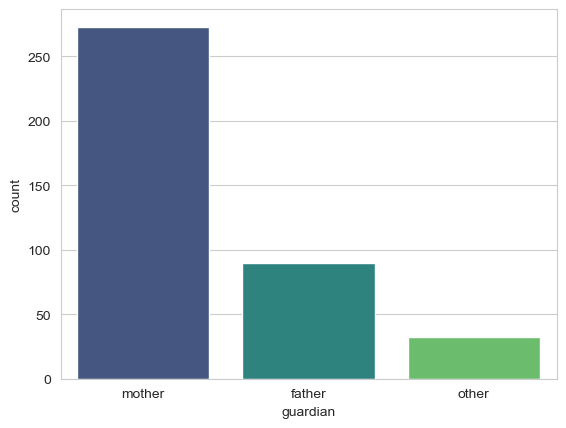

In [131]:
sns.countplot(x='guardian', hue='guardian', data=stud, palette='viridis')

- Approximately 69.11% students have mother as guardian, 22.78% students have father as guardian and 8.10% have other guardian

<Axes: xlabel='guardian', ylabel='count'>

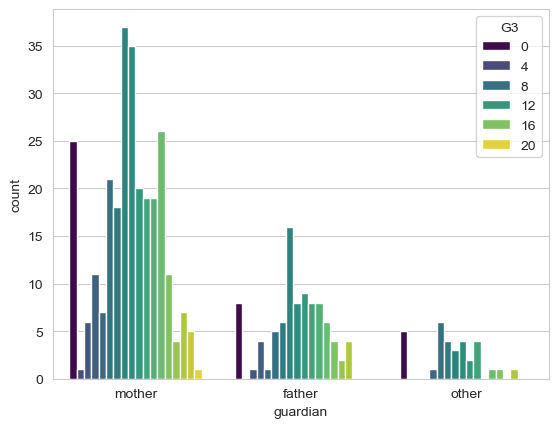

In [132]:
sns.countplot(x='guardian', hue='G3', data=stud, palette='viridis')

# EDA - Exploratory Data Analysis

## 1. Does age affect final grade?

Text(0.5, 1.0, 'Age vs Final Grade')

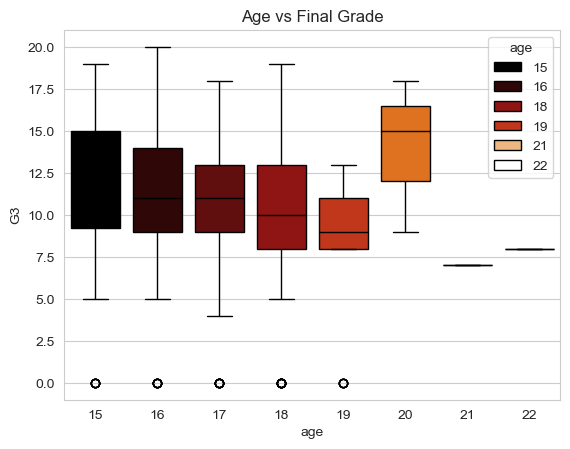

In [133]:
b = sns.boxplot(x='age', y='G3', hue='age', data=stud, palette='gist_heat')
b.axes.set_title('Age vs Final Grade')

- Plotting the distribution rather than statistics would help us better understand the data.
- The above plot shows that the median grades of the three age groups(15,16,17) are similar. Note the skewness of age group 19. (maybe due to sample size). Age group 20 seems to score highest grades among all.

Text(0.5, 1.0, 'Does age affect final grade?')

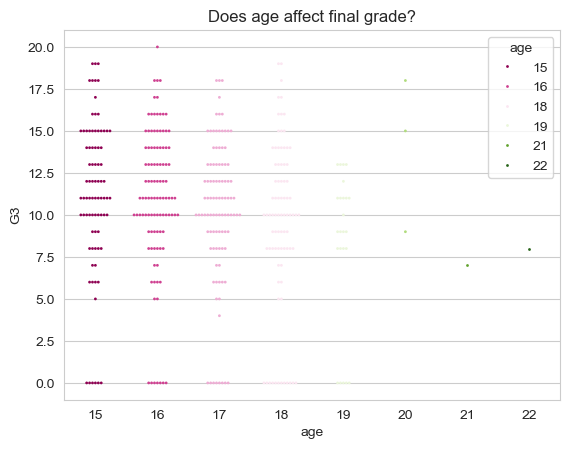

In [134]:
b = sns.swarmplot(x='age', y='G3', hue='age', data=stud, palette='PiYG', size=2)
b.axes.set_title('Does age affect final grade?')

## 2. Do urban students perform better than rural students?

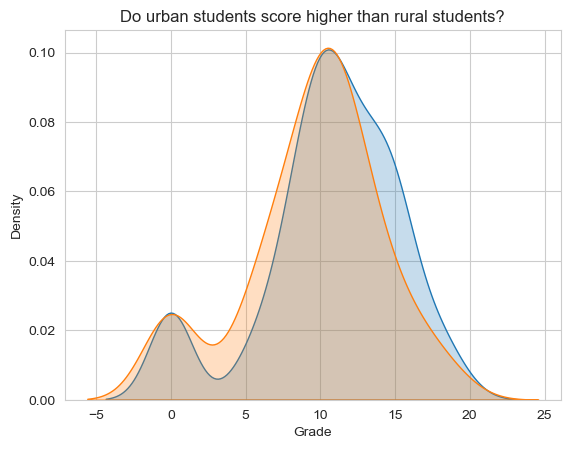

In [135]:
sns.kdeplot(stud.loc[stud['address'] == 'U', 'G3'], label='Urban', fill=True)
sns.kdeplot(stud.loc[stud['address'] == 'R', 'G3'], label='Rural', fill=True)
plt.title('Do urban students score higher than rural students?')
plt.xlabel('Grade')
plt.ylabel('Density')
plt.show()

- The above graph clearly shows there is not much difference between the grades based on location.

## 3. Does family size affect student grades?

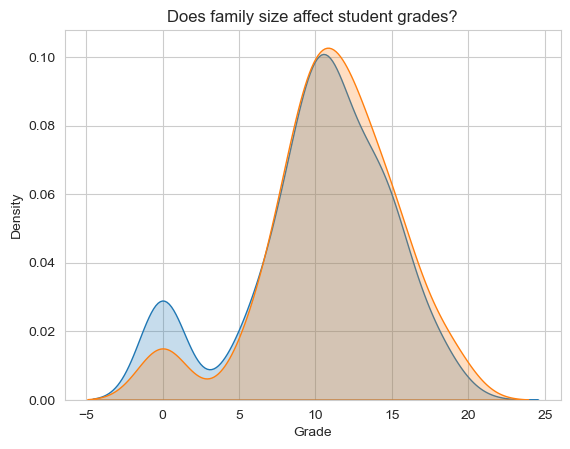

In [136]:
sns.kdeplot(stud.loc[stud['family_size'] == 'GT3', 'G3'], label='Greater than 3', fill=True)
sns.kdeplot(stud.loc[stud['family_size'] == 'LE3', 'G3'], label='Less than 3', fill=True)
plt.title('Does family size affect student grades?')
plt.xlabel('Grade')
plt.ylabel('Density')
plt.show()

- The above graph clearly shows there is not much difference between the grades based on family size.

## 4. Do students who live with family perform better than who don't?

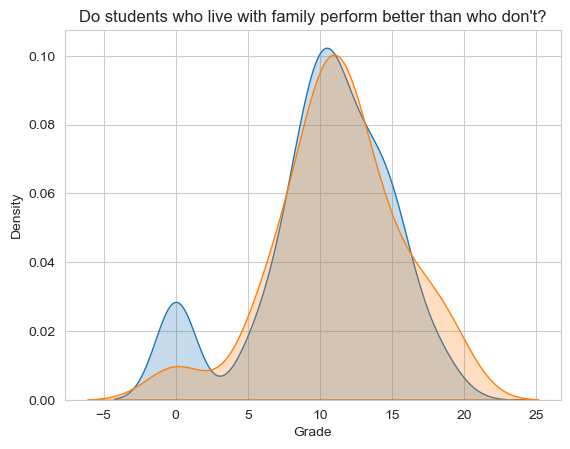

In [137]:
sns.kdeplot(stud.loc[stud['parent_cohabitation_status'] == 'T', 'G3'], label='Together', fill=True)
sns.kdeplot(stud.loc[stud['parent_cohabitation_status'] == 'A', 'G3'], label='Apart', fill=True)
plt.title('Do students who live with family perform better than who don\'t?')
plt.xlabel('Grade')
plt.ylabel('Density')
plt.show()

- The above graph clearly shows there is not much difference between the grades based on family cohabitation.

## 5. Do students guardian affect performance?

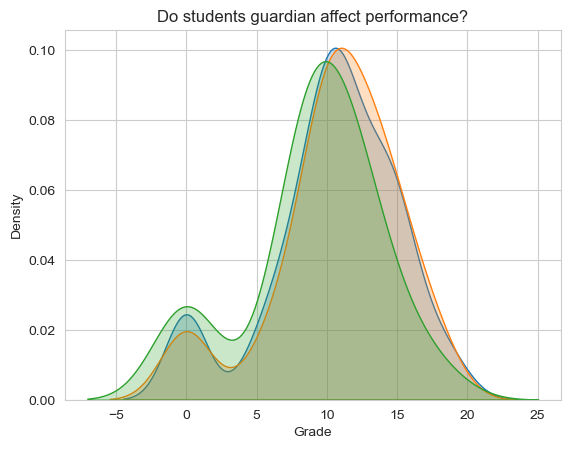

In [138]:
sns.kdeplot(stud.loc[stud['guardian'] == 'mother', 'G3'], label='Mother', fill=True)
sns.kdeplot(stud.loc[stud['guardian'] == 'father', 'G3'], label='Father', fill=True)
sns.kdeplot(stud.loc[stud['guardian'] == 'other', 'G3'], label='Other', fill=True)
plt.title('Do students guardian affect performance?')
plt.xlabel('Grade')
plt.ylabel('Density')
plt.show()

- The above graph clearly shows there is not much difference between the grades based on guardian.

In [139]:
stud.corr(numeric_only=True)['G3'].sort_values()

failures           -0.360415
age                -0.161579
goes_out           -0.132791
travel_time        -0.117142
health             -0.061335
freetime            0.011307
absences            0.034247
family_relation     0.051363
study_time          0.097820
father_education    0.152457
mother_education    0.217147
G1                  0.801468
G2                  0.904868
G3                  1.000000
Name: G3, dtype: float64

## Encoding categorical variables using LabelEncoder()

In [140]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
stud.iloc[:, 0] = le.fit_transform(stud.iloc[:, 0])
stud.iloc[:, 1] = le.fit_transform(stud.iloc[:, 1])
stud.iloc[:, 3] = le.fit_transform(stud.iloc[:, 3])
stud.iloc[:, 4] = le.fit_transform(stud.iloc[:, 4])
stud.iloc[:, 5] = le.fit_transform(stud.iloc[:, 5])
stud.iloc[:, 8] = le.fit_transform(stud.iloc[:, 8])
stud.iloc[:, 9] = le.fit_transform(stud.iloc[:, 9])
stud.iloc[:, 10] = le.fit_transform(stud.iloc[:, 10])
stud.iloc[:, 11] = le.fit_transform(stud.iloc[:, 11])
stud.iloc[:, 15] = le.fit_transform(stud.iloc[:, 15])
stud.iloc[:, 16] = le.fit_transform(stud.iloc[:, 16])
stud.iloc[:, 17] = le.fit_transform(stud.iloc[:, 17])
stud.iloc[:, 18] = le.fit_transform(stud.iloc[:, 18])
stud.iloc[:, 19] = le.fit_transform(stud.iloc[:, 19])
stud.iloc[:, 20] = le.fit_transform(stud.iloc[:, 20])
stud.iloc[:, 21] = le.fit_transform(stud.iloc[:, 21])
stud.iloc[:, 22] = le.fit_transform(stud.iloc[:, 22])

In [141]:
stud.head()

,school,sex,age,address,family_size,parent_cohabitation_status,mother_education,father_education,mother_job,father_job,...,internet,romantic,family_relation,freetime,goes_out,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,0,0,4,3,4,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,0,5,3,3,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,0,4,3,2,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,3,2,2,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,0,0,4,3,2,5,4,6,10,10


In [142]:
stud.tail()

,school,sex,age,address,family_size,parent_cohabitation_status,mother_education,father_education,mother_job,father_job,...,internet,romantic,family_relation,freetime,goes_out,health,absences,G1,G2,G3
390,1,1,20,1,1,0,2,2,3,3,...,0,0,5,5,4,4,11,9,9,9
391,1,1,17,1,1,1,3,1,3,3,...,1,0,2,4,5,2,3,14,16,16
392,1,1,21,0,0,1,1,1,2,2,...,0,0,5,5,3,3,3,10,8,7
393,1,1,18,0,1,1,3,2,3,2,...,1,0,4,4,1,5,0,11,12,10
394,1,1,19,1,1,1,1,1,2,0,...,1,0,3,2,3,5,5,8,9,9


In [143]:
stud.corr()['G3'].sort_values()

failures                     -0.360415
age                          -0.161579
goes_out                     -0.132791
romantic                     -0.129970
travel_time                  -0.117142
school_support               -0.082788
guardian                     -0.070109
health                       -0.061335
parent_cohabitation_status   -0.058009
school                       -0.045017
family_support               -0.039157
freetime                      0.011307
activities                    0.016100
absences                      0.034247
father_job                    0.042286
family_relation               0.051363
nursery                       0.051568
family_size                   0.081407
study_time                    0.097820
internet                      0.098483
paid                          0.101996
mother_job                    0.102082
sex                           0.103456
address                       0.105756
reason                        0.121994
father_education         

In [144]:
stud = stud.drop(['school', 'G1', 'G2'], axis='columns')

- Although G1 and G2 which are period grades of a student and are highly correlated to the final grade G3, we drop them. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful because we want to find other factors affect the grade.

In [145]:
most_correlated = stud.corr().abs()['G3'].sort_values(ascending=False)

most_correlated = most_correlated[:9]
most_correlated

G3                  1.000000
failures            0.360415
mother_education    0.217147
higher              0.182465
age                 0.161579
father_education    0.152457
goes_out            0.132791
romantic            0.129970
reason              0.121994
Name: G3, dtype: float64

In [146]:
stud = stud.loc[:, most_correlated.index]
stud.head()

,G3,failures,mother_education,higher,age,father_education,goes_out,romantic,reason
0,6,0,4,1,18,4,4,0,0
1,6,0,1,1,17,1,3,0,0
2,10,3,1,1,15,1,2,0,2
3,15,0,4,1,15,2,2,1,1
4,10,0,3,1,16,3,2,0,1


### Failure Attribute

Text(0.5, 1.0, 'Previous Failures vs Final Grade(G3)')

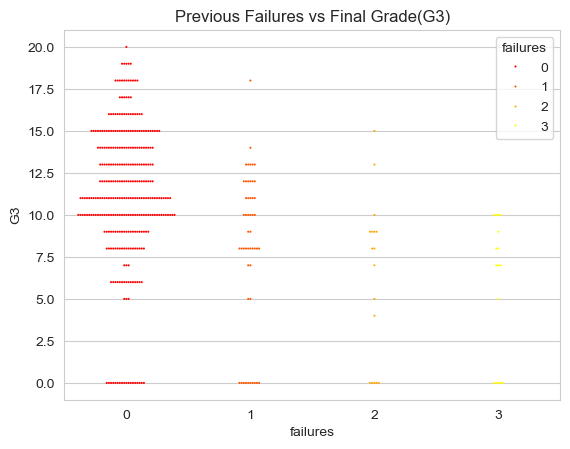

In [147]:
b = sns.swarmplot(x=stud['failures'], y=stud['G3'], hue=stud['failures'], palette='autumn', size=1.5)
b.axes.set_title('Previous Failures vs Final Grade(G3)')

**Observation :** Student with less previous failures usually score higher

### Family Education Attribute (Father's education + Mother's education)

Text(0.5, 1.0, 'Family Education vs Final Grade(G3)')

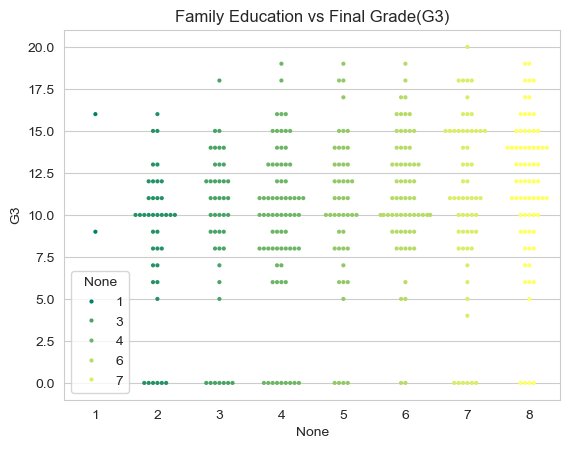

In [148]:
family_education = stud['father_education'] + stud['mother_education']
b = sns.swarmplot(x=family_education, y=stud['G3'], hue=family_education, palette='summer', size=3)
b.axes.set_title('Family Education vs Final Grade(G3)')

**Observation :** Educated families result in higher grades

### Wish to go for Higher Education Attribute

Text(0.5, 1.0, 'Higher Education vs Final Grade(G3)')

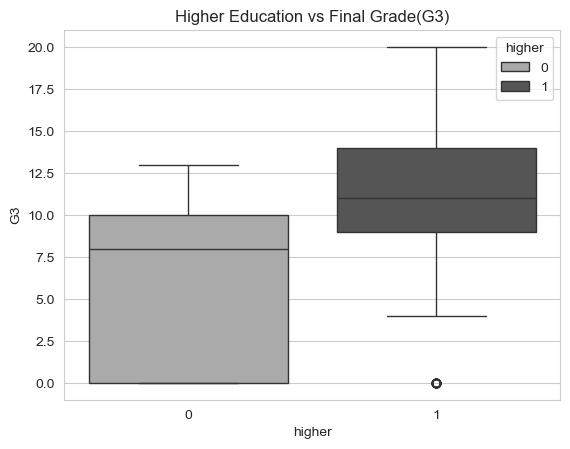

In [149]:
b = sns.boxplot(x=stud['higher'], y=stud['G3'], hue=stud['higher'], palette='binary')
b.axes.set_title('Higher Education vs Final Grade(G3)')

**Observation :** Students who wish to go for higher studies score more

## Going Out with Friends Attribute

Text(0.5, 1.0, 'Go Out vs Final Grade(G3)')

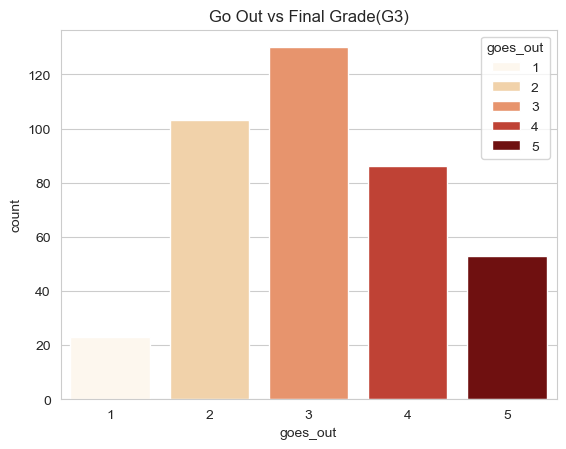

In [150]:
b = sns.countplot(x=stud['goes_out'], hue=stud['goes_out'], palette='OrRd')
b.axes.set_title('Go Out vs Final Grade(G3)')

**Observation :** The students have an average score when it comes to going out with friends.

Text(0.5, 1.0, 'Go Out vs Final Grade(G3)')

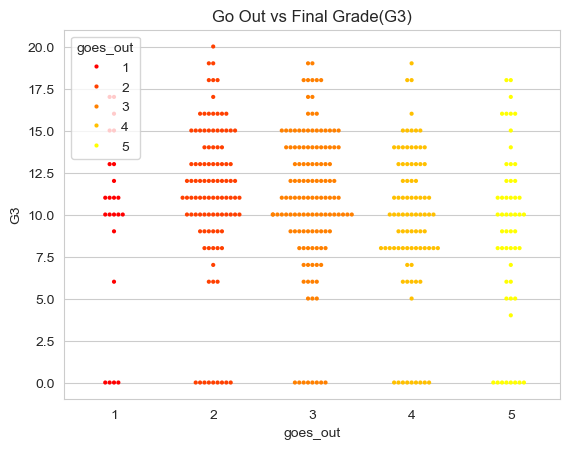

In [151]:
b = sns.swarmplot(x=stud['goes_out'], y=stud['G3'], hue=stud['goes_out'], palette='autumn', size=3)
b.axes.set_title('Go Out vs Final Grade(G3)')

**Observation :** Students who go out a lot score less

### Romantic relationship Attribute

Text(0.5, 1.0, 'Romantic Relationship vs Final Grade(G3)')

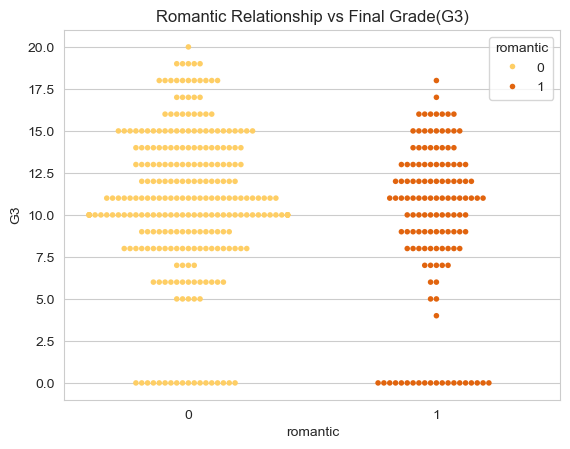

In [152]:
b = sns.swarmplot(x=stud['romantic'], y=stud['G3'], hue=stud['romantic'], palette='YlOrBr', size=4)
b.axes.set_title('Romantic Relationship vs Final Grade(G3)')

- Here romantic attribute with value 0 means no relationship and value with 1 means in relationship

**Observation :** Students with no romantic relationship score higher

### Reason Attribute

Text(0.5, 1.0, 'Reason vs Students Count')

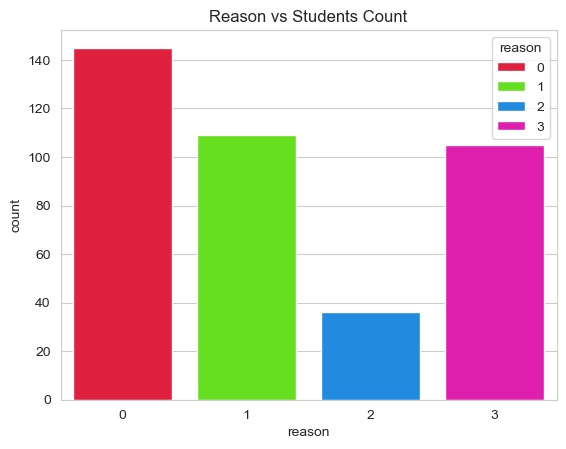

In [153]:
b = sns.countplot(x='reason', hue='reason', data=stud, palette='gist_rainbow')
b.axes.set_title('Reason vs Students Count')

Text(0.5, 1.0, 'Reason vs Final grade')

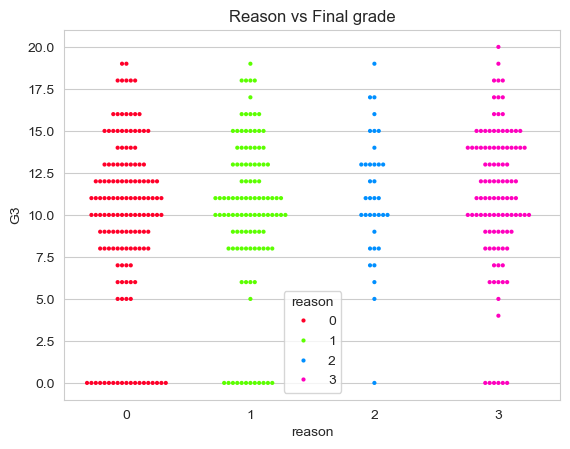

In [154]:
b = sns.swarmplot(x='reason', y='G3', hue='reason', data=stud, palette='gist_rainbow', size=3)
b.axes.set_title('Reason vs Final grade')

**Observation :** The students have an equally distributed average score when it comes to reason attribute.

# Machine Learning Algorithms

In [155]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split

In [156]:
X_train, X_test, Y_train, Y_test = train_test_split(stud, stud['G3'], test_size=0.25, random_state=42)

In [157]:
X_train.head()

,G3,failures,mother_education,higher,age,father_education,goes_out,romantic,reason
16,14,0,4,1,16,4,3,0,3
66,12,0,4,1,15,4,3,1,3
211,13,0,4,1,17,4,5,1,1
7,6,0,4,1,17,4,4,0,1
19,10,0,4,1,16,3,3,0,1


## MAE - Mean Absolute Error & RMSE - Root Mean Square Error

In [158]:
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))

    return mae, rmse

In [159]:
median_prediction = X_train['G3'].median()
median_predictions = [median_prediction for _ in range(len(X_test))]

true = X_test['G3']

In [160]:
mb_mae, mb_rmse = evaluate_predictions(median_predictions, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

Median Baseline  MAE: 3.7879
Median Baseline RMSE: 4.8252


In [161]:
def evaluate(x_train, x_test, y_train, y_test):
    x_train = x_train.drop('G3', axis='columns')
    x_test = x_test.drop('G3', axis='columns')
    
    models = {
        "Linear Regression": LinearRegression(),
        "ElasticNet Regression": ElasticNet(alpha=1.0, l1_ratio=0.5),
        "Random Forest": RandomForestRegressor(n_estimators=100),
        "Extra Trees": ExtraTreesRegressor(n_estimators=100),
        "SVM": SVR(kernel='rbf', degree=3, C=1.0, gamma='auto'),
        "Gradient Boosted": GradientBoostingRegressor(n_estimators=50)
    }
    results = pd.DataFrame(columns=['mae', 'rmse'], index=models.keys())

    for model_name, model in models.items():
        model.fit(x_train, y_train)
        predictions = model.predict(x_test)

        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))

        results.loc[model_name, :] = [mae, rmse]

    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))

    results.loc['Baseline', :] = [baseline_mae, baseline_rmse]

    return results, models

In [162]:
results, models = evaluate(X_train, X_test, Y_train, Y_test)
results

,mae,rmse
Linear Regression,3.485115,4.432597
ElasticNet Regression,3.608051,4.573274
Random Forest,3.643818,4.607468
Extra Trees,3.738418,4.697488
SVM,3.549266,4.581466
Gradient Boosted,3.57259,4.500709
Baseline,3.787879,4.825228


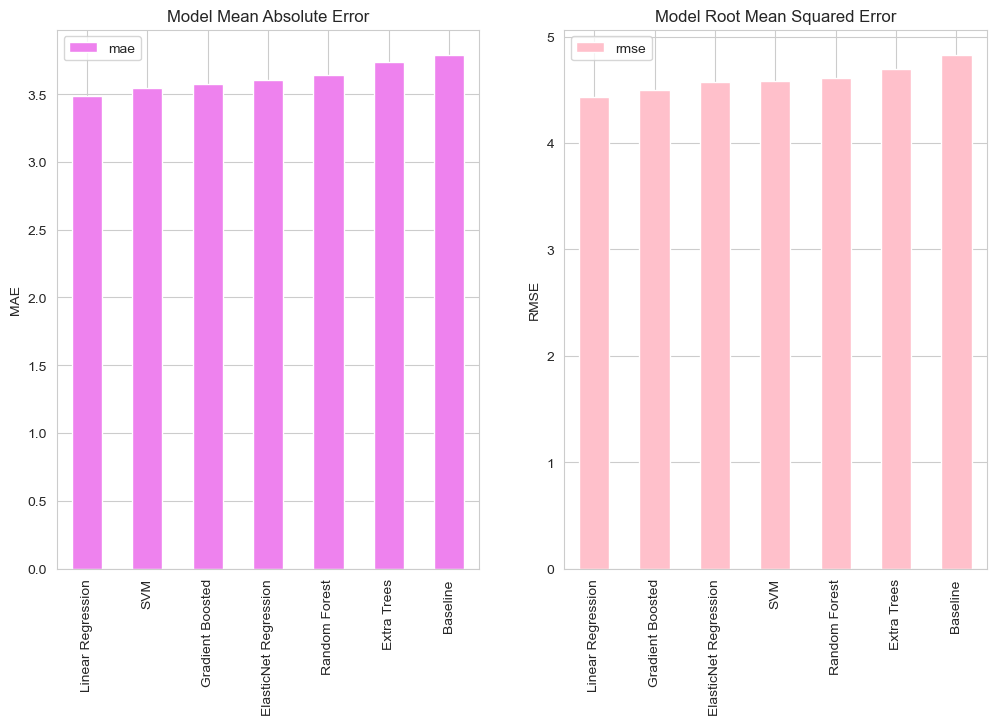

In [163]:
plt.figure(figsize=(12, 7))

ax = plt.subplot(1, 2, 1)
results.sort_values('mae', ascending=True).plot.bar(y='mae', color='violet', ax=ax)
plt.title('Model Mean Absolute Error')
plt.ylabel('MAE')

ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending=True).plot.bar(y='rmse', color='pink', ax=ax)
plt.title('Model Root Mean Squared Error')
plt.ylabel('RMSE')

plt.show()

Conclusion: As we see both Model Mean Absolute Error & Model Root Mean Squared Error that the linear regression is performing the best in both cases